In [2]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score,r2_score
from sklearn.metrics import roc_curve, auc

C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df = pd.read_csv("C:\\Users\\Abhishek Singh\\Downloads\\german_credit.csv")

## Segregating response, categorical & numeric variables

In [5]:
target_var = ['Creditability']
cat_var = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 
           'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 
           'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits', 'Type of apartment',
          'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']
num_var = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']

In [6]:
df1 = df.copy()
df1.drop(labels = target_var, axis=1, inplace = True)
df1.columns

Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

## Data Tranformation of Categorical Independent Variables

In [7]:
df2 = pd.get_dummies(data = df1, columns = cat_var, drop_first = False)
df2.head(5)

,Duration of Credit (month),Credit Amount,Age (years),Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,18,1049,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,9,2799,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,12,841,23,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,12,2122,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,12,2171,38,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Creating X & y to split, train & test

In [8]:
y = df[target_var].values
X= df2.values
y = np.ravel(y)
print "Size of y is {}".format(y.shape)
print "Sample output for y : {}".format(y[:5])
print "Size of X is {}".format(X.shape)
print "Sample output forr X :\n {}".format(X[:5,:])

SyntaxError: invalid syntax (<ipython-input-8-194e4280ac99>, line 4)

## Building a Decision Tree

Training accuracy is 80.0
Test accuracy is 69.6
Confusin Matrix 
 [[ 49  99]
 [ 53 299]]
Classification Report 
              precision    recall  f1-score   support

          0       0.48      0.33      0.39       148
          1       0.75      0.85      0.80       352

avg / total       0.67      0.70      0.68       500

Mean validation accuracy across 10 splits for train data is 0.677831132453
Mean validation accuracy across 10 splits for train data is 0.708
FP Rate, TP Rate & Thresholds
FP Rate is 
 [ 0.          0.08108108  0.14189189  0.16216216  0.18918919  0.2027027
  0.47972973  0.52027027  0.60135135  0.66216216  0.66891892  0.75675676
  0.75675676  0.77702703  0.89189189  0.91891892  1.        ]
TP Rate is 
 [ 0.          0.13068182  0.42329545  0.4375      0.49431818  0.51420455
  0.69602273  0.71875     0.73863636  0.80681818  0.84943182  0.90625
  0.92045455  0.93181818  0.98011364  0.99431818  1.        ]


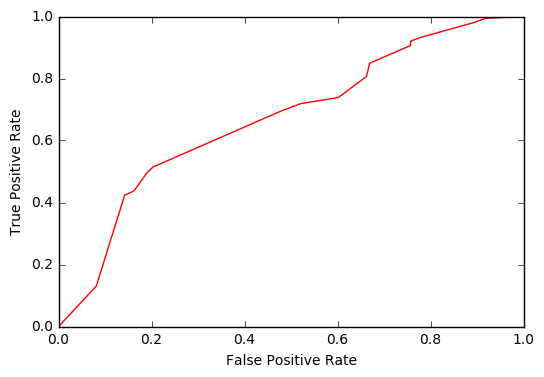

Area under the curve is 0.671471898034


In [10]:
clf = tree.DecisionTreeClassifier(min_samples_leaf =10,max_depth =5)
clf = clf.fit(X_train, y_train)

#predicting class labels for train set
predict_train = clf.predict(X_train)

# predicting probabilities
probs_train = clf.predict_proba(X_train)

#predicting class labels for test set
predict_test = clf.predict(X_test)

# predicting probabilities
probs_test = clf.predict_proba(X_test)

#Evaluating the model
print "Training accuracy is {}".format((metrics.accuracy_score(y_train,predict_train))*100)
print "Test accuracy is {}".format((metrics.accuracy_score(y_test,predict_test))*100)

#Creating a confusion matrix
print "Confusin Matrix \n {}".format(metrics.confusion_matrix(y_test, predict_test))

#generating a classification report
print "Classification Report \n {}".format(metrics.classification_report(y_test, predict_test))

#Introducing cross validation and evaluating the models

print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 10)))
print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X, y, scoring = 'accuracy', cv = 10)))

#ROC for the model
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:,1], pos_label = 1 )
print "FP Rate, TP Rate & Thresholds"
print "FP Rate is \n {}".format(fpr)
print "TP Rate is \n {}".format(tpr)
# print thresholds
# print fpr.shape
# print tpr.shape
# print thresholds.shape

#plotting the ROC curve
fig=plt.figure()
plt.plot(fpr, tpr, 'r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
fig.savefig('png2.png')
plt.close()

#Calculating Area under the curve
print "Area under the curve is {}".format(metrics.auc(fpr,tpr))





## Changing Split Criterion and Comparing Performance

Training accuracy is 100.0
Test accuracy is 68.2
Confusion Matrix 
 [[ 70  78]
 [ 81 271]]
Classification Report 
              precision    recall  f1-score   support

          0       0.46      0.47      0.47       148
          1       0.78      0.77      0.77       352

avg / total       0.68      0.68      0.68       500

Mean validation accuracy across 10 splits for train data is 0.657826330532
Mean validation accuracy across 10 splits for train data is 0.652
Area under the curve for split criteria gini is 0.621429668305
Training accuracy is 100.0
Test accuracy is 68.4
Confusion Matrix 
 [[ 68  80]
 [ 78 274]]
Classification Report 
              precision    recall  f1-score   support

          0       0.47      0.46      0.46       148
          1       0.77      0.78      0.78       352

avg / total       0.68      0.68      0.68       500

Mean validation accuracy across 10 splits for train data is 0.640384953982
Mean validation accuracy across 10 splits for train data is 0

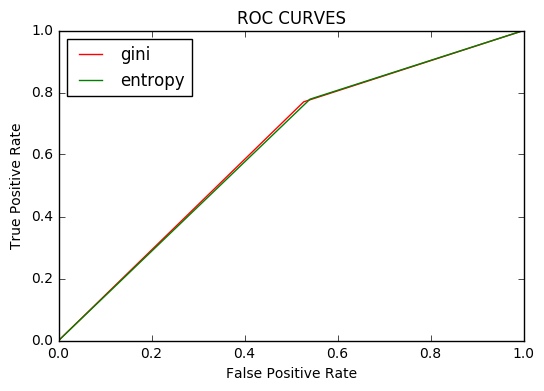

[100.0, 100.0]
[68.200000000000003, 68.400000000000006]


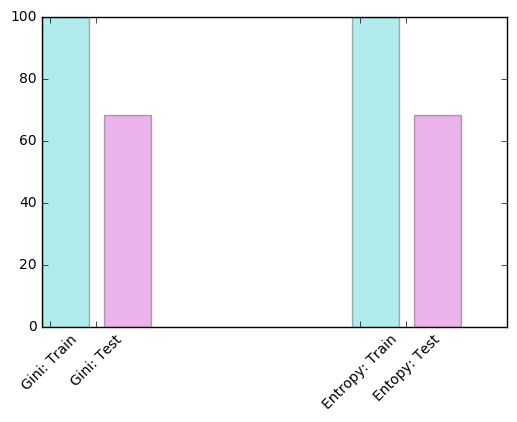

In [11]:
split_criteria = ['gini','entropy']
d1 = {}
d2 = {}
d3 = {}
d4 = {}
fig=plt.figure()

color = {'gini':'r','entropy':'g'}

for sc in split_criteria:
    clf = tree.DecisionTreeClassifier(criterion = sc)
    clf = clf.fit(X_train, y_train)

    #predicting class labels for train set
    predict_train = clf.predict(X_train)

    # predicting probabilities
    probs_train = clf.predict_proba(X_train)

    #predicting class labels for test set
    predict_test = clf.predict(X_test)

    # predicting probabilities
    probs_test = clf.predict_proba(X_test)

    #Evaluating the model
    print "Training accuracy is {}".format((metrics.accuracy_score(y_train,predict_train))*100)
    print "Test accuracy is {}".format((metrics.accuracy_score(y_test,predict_test))*100)
    d1[sc] = (metrics.accuracy_score(y_train, predict_train))*100
    d2[sc] = (metrics.accuracy_score(y_test,predict_test))*100
    #Creating a confusion matrix
    print "Confusion Matrix \n {}".format(metrics.confusion_matrix(y_test, predict_test))

    #generating a classification report
    print "Classification Report \n {}".format(metrics.classification_report(y_test, predict_test))

    #Introducing cross validation and evaluating the models
    print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 10)))
    print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X, y, scoring = 'accuracy', cv = 10)))
    
    #ROC for the model
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:,1], pos_label = 1 )
    d3[sc] = fpr
    d4[sc] = tpr
#     print fpr
#     print tpr
#     print thresholds
#     print fpr.shape
#     print tpr.shape
#     print thresholds.shape

    #plotting the ROC curve
    plt.plot(fpr, tpr, color[sc], label = sc)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVES")
# fig.savefig('png2.png')
# plt.close()

    #Calculating Area under the curve
    print "Area under the curve for split criteria {} is {}".format(sc,metrics.auc(fpr,tpr))

plt.legend(loc=2)
plt.show()

#Comparing accuracies for the two split Criteria
fig = plt.figure()
n = 4
ind = np.arange(0,4.0,1)
list_train = []
list_test = []

for sc in split_criteria:
    list_train.append(d1[sc])
for sc in split_criteria:
    list_test.append(d2[sc])

print list_train
print list_test

fig,ax = plt.subplots()
ax.bar(ind[[0,2]],list_train, 0.3, color = 'c', alpha = 0.3)
ind[1] = ind[0] + 0.3
ind[3] = ind[2] + 0.3
ax.bar(ind[[1,3]]+0.1, list_test, 0.3, color = 'm', alpha = 0.3)
ax.set_xticks(ind+0.1/2)
ax.set_xticklabels(['Gini: Train','Gini: Test','Entropy: Train','Entopy: Test'],rotation=45)
plt.show()

## Best Split Vs. Random Split

Training accuracy is 100.0
Test accuracy is 69.2
Confusion Matrix 
 [[ 73  75]
 [ 79 273]]
Classification Report 
              precision    recall  f1-score   support

          0       0.48      0.49      0.49       148
          1       0.78      0.78      0.78       352

avg / total       0.69      0.69      0.69       500

Mean validation accuracy across 10 splits for train data is 0.639863945578
Mean validation accuracy across 10 splits for train data is 0.66
Area under the curve for split criteria best is 0.634405712531
Training accuracy is 100.0
Test accuracy is 68.4
Confusion Matrix 
 [[ 73  75]
 [ 83 269]]
Classification Report 
              precision    recall  f1-score   support

          0       0.47      0.49      0.48       148
          1       0.78      0.76      0.77       352

avg / total       0.69      0.68      0.69       500

Mean validation accuracy across 10 splits for train data is 0.634420968387
Mean validation accuracy across 10 splits for train data is 0.

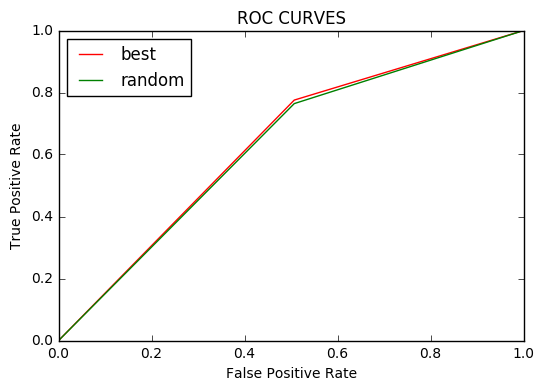

[100.0, 100.0]
[69.199999999999989, 68.400000000000006]


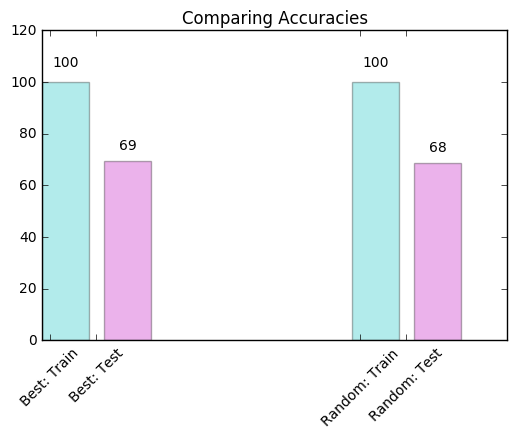

In [12]:
splitter = ['best','random']
d1 = {}
d2 = {}
d3 = {}
d4 = {}
fig=plt.figure()

color = {'best':'r','random':'g'}

for sc in splitter:
    clf = tree.DecisionTreeClassifier(splitter = sc)
    clf = clf.fit(X_train, y_train)

    #predicting class labels for train set
    predict_train = clf.predict(X_train)

    # predicting probabilities
    probs_train = clf.predict_proba(X_train)

    #predicting class labels for test set
    predict_test = clf.predict(X_test)

    # predicting probabilities
    probs_test = clf.predict_proba(X_test)

    #Evaluating the model
    print "Training accuracy is {}".format((metrics.accuracy_score(y_train,predict_train))*100)
    print "Test accuracy is {}".format((metrics.accuracy_score(y_test,predict_test))*100)
    d1[sc] = (metrics.accuracy_score(y_train, predict_train))*100
    d2[sc] = (metrics.accuracy_score(y_test,predict_test))*100
    #Creating a confusion matrix
    print "Confusion Matrix \n {}".format(metrics.confusion_matrix(y_test, predict_test))

    #generating a classification report
    print "Classification Report \n {}".format(metrics.classification_report(y_test, predict_test))

    #Introducing cross validation and evaluating the models
    print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 10)))
    print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X, y, scoring = 'accuracy', cv = 10)))
    
    #ROC for the model
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:,1], pos_label = 1 )
    d3[sc] = fpr
    d4[sc] = tpr


    #plotting the ROC curve
    plt.plot(fpr, tpr, color[sc], label = sc)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVES")

    #Calculating Area under the curve
    print "Area under the curve for split criteria {} is {}".format(sc,metrics.auc(fpr,tpr))

plt.legend(loc=2)
plt.show()

#Comparing accuracies for the two split Criteria
fig = plt.figure()
n = 4
ind = np.arange(0,4.0,1)
list_train = []
list_test = []

for sc in splitter:
    list_train.append(d1[sc])
for sc in splitter:
    list_test.append(d2[sc])

print list_train
print list_test

fig,ax = plt.subplots()
rect1=ax.bar(ind[[0,2]],list_train, 0.3, color = 'c', alpha = 0.3)
ind[1] = ind[0] + 0.3
ind[3] = ind[2] + 0.3
rect2=ax.bar(ind[[1,3]]+0.1, list_test, 0.3, color = 'm', alpha = 0.3)
ax.set_title("Comparing Accuracies")
ax.set_xticks(ind+0.1/2)
ax.set_xticklabels(['Best: Train','Best: Test','Random: Train','Random: Test'],rotation=45)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

ax.set_ylim([0,120])
autolabel(rect1)
autolabel(rect2)
plt.show()

## Varying the number of features considered for split


Training accuracy is 88.8
Test accuracy is 66.4
Area under the curve for split criteria 2 is 0.607925752457
Training accuracy is 91.6
Test accuracy is 69.4
Area under the curve for split criteria 5 is 0.667421683047
Training accuracy is 95.6
Test accuracy is 65.2
Area under the curve for split criteria 10 is 0.599163083538
Training accuracy is 93.8
Test accuracy is 67.8
Area under the curve for split criteria sqrt is 0.658572635135
Training accuracy is 91.4
Test accuracy is 63.4
Area under the curve for split criteria log2 is 0.584497850123


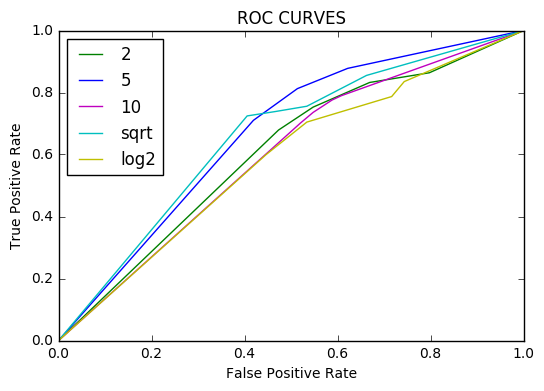

[88.799999999999997, 91.600000000000009, 95.599999999999994, 93.799999999999997, 91.400000000000006]
[66.400000000000006, 69.399999999999991, 65.200000000000003, 67.800000000000011, 63.399999999999999]


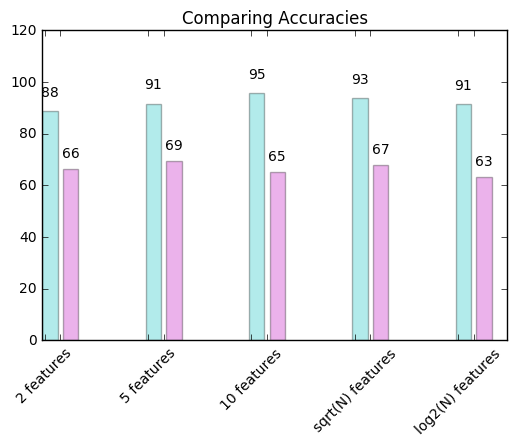

In [13]:
features = [2,5,10,'sqrt','log2']
d1 = {}
d2 = {}
d3 = {}
d4 = {}
fig=plt.figure()

color = {2:'g', 5: 'b', 10: 'm', 'sqrt' : 'c','log2' : 'y'}

for sc in features:
    clf = tree.DecisionTreeClassifier(max_features = sc, min_samples_split = 4)
    clf = clf.fit(X_train, y_train)

    #predicting class labels for train set
    predict_train = clf.predict(X_train)

    # predicting probabilities
    probs_train = clf.predict_proba(X_train)

    #predicting class labels for test set
    predict_test = clf.predict(X_test)

    # predicting probabilities
    probs_test = clf.predict_proba(X_test)

    #Evaluating the model
    print "Training accuracy is {}".format((metrics.accuracy_score(y_train,predict_train))*100)
    print "Test accuracy is {}".format((metrics.accuracy_score(y_test,predict_test))*100)
    d1[sc] = (metrics.accuracy_score(y_train, predict_train))*100
    d2[sc] = (metrics.accuracy_score(y_test,predict_test))*100
    #Creating a confusion matrix
#     print "Confusion Matrix \n {}".format(metrics.confusion_matrix(y_test, predict_test))

    #generating a classification report
#     print "Classification Report \n {}".format(metrics.classification_report(y_test, predict_test))

    #Introducing cross validation and evaluating the models
#     print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = 10)))
#     print "Mean validation accuracy across 10 splits for train data is {}".format(np.mean(cross_val_score(clf, X, y, scoring = 'accuracy', cv = 10)))
    
    #ROC for the model
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:,1], pos_label = 1 )
    d3[sc] = fpr
    d4[sc] = tpr

    #plotting the ROC curve
    plt.plot(fpr, tpr, color[sc], label = sc)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVES")

    #Calculating Area under the curve
    print "Area under the curve for split criteria {} is {}".format(sc,metrics.auc(fpr,tpr))

plt.legend(loc=2)
plt.show()

#Comparing accuracies for the two split Criteria
fig = plt.figure()
n = 2 *  len(features)
ind = np.arange(0,n,1)*1.0
list_train = []
list_test = []

for sc in features:
    list_train.append(d1[sc])
for sc in features:
    list_test.append(d2[sc])

print list_train
print list_test

fig,ax = plt.subplots()
rect1=ax.bar(ind[[0,2,4,6,8]],list_train, 0.3, color = 'c', alpha = 0.3)
# ind[1] = ind[0] + 0.3
# ind[3] = ind[2] + 0.3
# ind[5] = ind[4] + 0.3
for i in [1,3,5,7,9]:
    ind[i] =  ind[i-1] + 0.3
    
rect2=ax.bar(ind[[1,3,5,7,9]] + 0.1, list_test, 0.3, color = 'm', alpha = 0.3)
ax.set_title("Comparing Accuracies")
ax.set_xticks(ind+0.1/2)
ax.set_xticklabels(['2 features','', '5 features','', '10 features','', 'sqrt(N) features','', 'log2(N) features', ''],rotation=45)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

ax.set_ylim([0,120])
autolabel(rect1)
autolabel(rect2)
plt.show()